In [17]:
import numpy as np

# Open the .txt file containing the list of urls

1) open the .txt file which contains the list of urls. Our goal is to download the files in those urls in parallel to achieve speed up

In [18]:
f = open('urls.txt', 'r')       # "r" stand for read only mode

# Read the contents of the file

In [19]:
content = f.read()

# The type of the variable "content" is strings

In [20]:
type(content)
# The varibale "content" will have all the urls as a single string with each url separated by a newline character, "\n"

str

# Convert the single string, "content" to a list by using split() method


## Syntax
string.split(separator, maxsplit)

## Parameter Values
**1) separator**: (Optional) specifies the separator to use when splitting the string. By default any whitespace is a separator.<br>

**2) maxsplit**: (Optional) specifies how many splits to do. Default value is -1, which is "all occurrences"


In [21]:
urls =  content.split('\n')                          # string.split(separator, maxsplit)

In [22]:
# Display the first three links
urls[0:3]

['http://www.crystallography.net/cod/1000044.cif',
 'http://www.crystallography.net/cod/1008127.cif',
 'http://www.crystallography.net/cod/1008128.cif']

In [23]:
len(urls)     # this will print the number of urls

35776

# The variable "urls" is a list containing all urls (strings)

In [24]:
type(urls)          # the varible urls is a list containing strings

list

In [25]:
type(urls[0])

str

In [26]:
urls[0:5]  # This will print the first five urls stored in the list "urls"

['http://www.crystallography.net/cod/1000044.cif',
 'http://www.crystallography.net/cod/1008127.cif',
 'http://www.crystallography.net/cod/1008128.cif',
 'http://www.crystallography.net/cod/1008129.cif',
 'http://www.crystallography.net/cod/1008130.cif']

In [27]:
urls.remove('')             # removes any bank entry

In [28]:
len(urls)                   # displays the number of entries (urls) in the list "urls"

35775

In [29]:
urls[0]                     # displays the first url

'http://www.crystallography.net/cod/1000044.cif'

# Download the file "1000044.cif" from the above link and save it as "1000044.cif"

## 1) display "1000044.cif" from the string 'http://www.crystallography.net/cod/1000044.cif'

In [30]:
urls[0][len(urls[0]) - 11:]

# here, 11 is the number of characters in '1000044.cif'

'1000044.cif'

# Or

The **rsplit()** method: The "r" in "rsplit()" stands for right and it splits a string into a list, starting from the right.

## syntax:

**string.rsplit(separator, maxsplit)**:

1) **separator**:	Optional. Specifies the separator to use when splitting the string. By default any whitespace is a separator.
2) **maxsplit**:	Optional. Specifies how many splits to do. Default value is -1, which is "all occurrences"

In [31]:
temp = urls[0].rsplit('/')

print(temp)

# Here, temp is a list containing all the strings seperated by "/" as shown below.


['http:', '', 'www.crystallography.net', 'cod', '1000044.cif']


In [32]:
temp = urls[0].rsplit('/',1)              # This will split the string in two parts, (indexed as 0 and 1)

print(temp)

['http://www.crystallography.net/cod', '1000044.cif']


In [33]:
# our required string is the last entry in the list "temp"

temp[1]       # Or, temp[-1]

'1000044.cif'

# Or

In [34]:
urls[0].rsplit('/')[-1]          # Or, temp[-1]

'1000044.cif'

## 2) download the file from the link and save it with name "1000044.cif"

In [35]:
import requests        # this is the library to download files from a url

r = requests.get(urls[0], allow_redirects=True);

open('./cif_files/%s' % urls[0].rsplit('/')[-1],  'wb').write(r.content);     

# here,
#./ means current or working directory
# 'wb' stands for "write binary"
# %s means % strings

# Check if the downloaded file works

In [36]:
# import the library for manimulating cif data
import Dans_Diffraction as dif

# define relevant parameters
energy_kev = dif.fc.wave2energy(1.54059)

xtl = dif.Crystal('./cif_files/1000044.cif');
        
# get the lattice parameters, a,b,c, and alpha, beta, gamma
lattice_parameters = xtl.Cell.lp();

# get the 2theta, corresponding intensities, and reflections (h,k, l values (Miler indices)

xtl.Scatter.setup_scatter(energy_kev=energy_kev, min_twotheta=5, max_twotheta=100, scattering_type='xray', powder_units='tth');
twotheta, intensity, reflections = xtl.Scatter.powder(units='tth', peak_width=0.01, background=0);


Scatter(1000044 with 2 atomic positions, 192 symmetries)
       Type: xray
     Energy: 8.047853674810085 keV
 Wavelength: 1.54059 A
 ---Settings---
      Powder units: tth
    Isotropic ADPs: True
  Specular Direction (reflection): ( 0, 0, 1)
Parallel Direction (transmission): ( 0, 0, 1)
      theta offset: 0.0
         min theta: -180.0
         max theta: 180.0
      min twotheta: 5
      max twotheta: 100
 ---X-Ray Settings---
 Waasmaier scattering factor: False
 ---Magnetic Settings---
   Mag. scattering: True
  Mag. form factor: True
         Polarised: False
      Polarisation: sp
       Pol. vector: (0,1,0)
 ---Resonant Settings---
   Azimuthal angle: 0
    Azimuthal ref.: (1,0,0)
               flm: (0,1,0)
  use e1e1 approx.: True



In [37]:
print(lattice_parameters)

(4.799, 4.799, 4.799, 90.0, 90.0, 90.0)


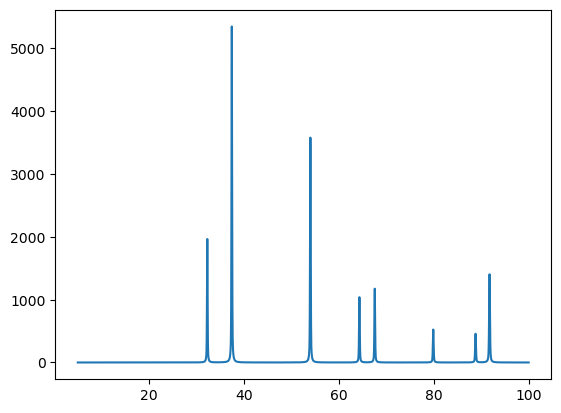

In [38]:
import matplotlib.pyplot as plt

plt.plot(twotheta, intensity)

plt.show()


# Create a function to download a file from a given url

In [39]:
from joblib import Parallel, delayed

def download_files(url, x = True):
    if x == False:
        r = requests.get(url, allow_redirects=True);
        open('./cif_files/testing/%s' % url.rsplit('/',1)[-1],  'wb').write(r.content);
    else:
        r = requests.get(url, allow_redirects=True);
        open('./cif_files/training/%s' % url.rsplit('/',1)[-1],  'wb').write(r.content);

#Parallel(n_jobs = -1)(delayed(download_files)(url) for url in urls[0:3]);

# suffle the list of urls and download from first 2048 urls

In [40]:
import random

shuffled_urls = random.sample(urls, len(urls))

shuffled_urls[0:5]

['http://www.crystallography.net/cod/4133463.cif',
 'http://www.crystallography.net/cod/4124654.cif',
 'http://www.crystallography.net/cod/4121541.cif',
 'http://www.crystallography.net/cod/4118931.cif',
 'http://www.crystallography.net/cod/4108078.cif']

In [41]:
# number of items in "suffle
training_urls = shuffled_urls[:2048]

testing_urls = shuffled_urls[2048:2048+100]

print(len(training_urls), len(testing_urls))

2048 100


In [42]:
# save 2048 cif files for training

Parallel(n_jobs = -1)(delayed(download_files)(url) for url in training_urls);

# here,
# n_jobs : number of processor/threads you want, (-1) means all available

In [43]:
# save 100 cif files for testing
Parallel(n_jobs = -1)(delayed(download_files)(url, False) for url in testing_urls);

# Tips:

1) CTRL+/ is a toggle for comment and uncomment!
2) In python, all folder names in a directory path are seperated by "/". For eg. "./my_folder/my_subfolder/". This is opposite of how directory paths look like in windows 11 which is for example: "C:\my_folder\my_subfolder\"